In [2]:
import pandas as pd
from rich import columns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn  
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
def z_filter(data, columns, alpha = 2):
    result = data.copy()
    for column in columns:
        result = result[abs((result[column] - result[column].mean())/result[column].std()) < alpha]
    return result

In [5]:
data = pd.read_csv('diabetes.csv', sep=',').drop_duplicates()
data = z_filter(data, ['SkinThickness', 'Glucose', 'BloodPressure', 'Pregnancies', 'BMI', 'Age'], alpha=3)
mean_value = data.loc[:, 'SkinThickness'].mean()
#data['SkinThickness'].replace(0, mean_value)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
first_type, second_type = data[data['Insulin'] == 0], data[data['Insulin'] > 0]
first_type = z_filter(first_type.drop(columns='Insulin'), ['SkinThickness', 'Glucose', 'BloodPressure', 'Pregnancies', 'BMI', 'Age'], alpha=3.5)
second_type = z_filter(second_type.drop(columns='Insulin'), ['SkinThickness', 'Glucose', 'BloodPressure', 'Pregnancies', 'BMI', 'Age'], alpha=3.5)
print(f"first type size: {first_type.axes[0].size}, second type size: {second_type.axes[0].size}")

first type size: 327, second type size: 383


<AxesSubplot:>

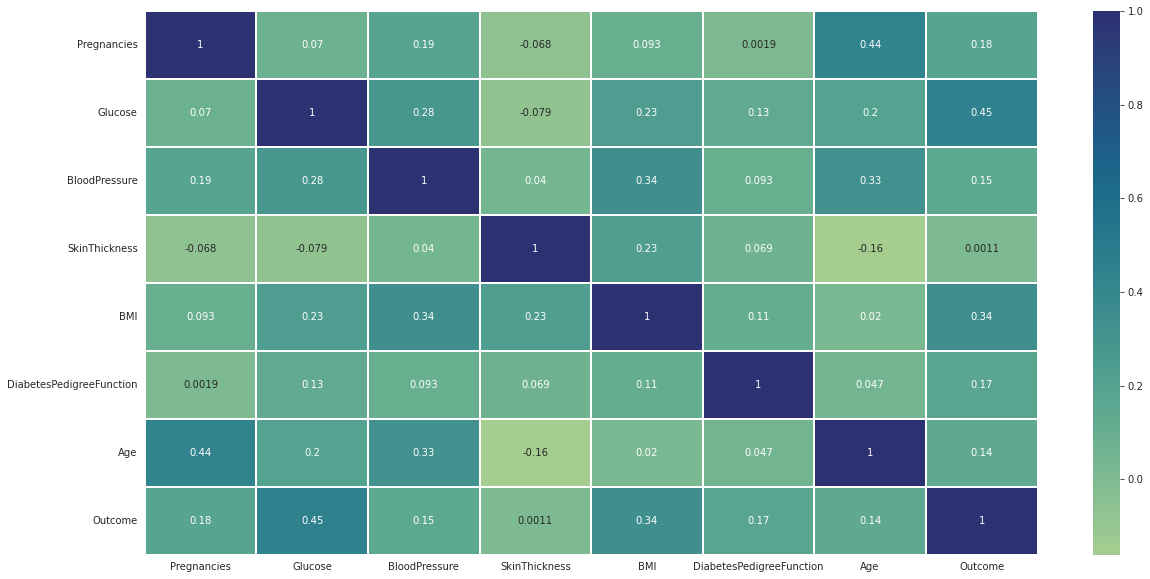

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(first_type.corr(), cmap='crest', linewidth=0.2, annot=True)

In [7]:
train_data, test_data = train_test_split(first_type, test_size=0.20, random_state=23042020)

In [8]:
train_data_features = train_data.drop(['Outcome'], axis=1)
train_data_target = train_data['Outcome']
test_data_features = test_data.drop(['Outcome'], axis=1)
test_data_target = test_data['Outcome']

In [388]:
%%time

best_estim = 0
best_accuracy = 0

for estim in range(1,50):
    model = RandomForestClassifier(random_state=23042020, n_estimators=estim)
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(test_data_features)
    accuracy = accuracy_score(test_data_target, valid_predictions)
    print('Количество деревьев', estim,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшая количество деревьев', best_estim,'Лучшая точность', best_accuracy)      

Количество деревьев 1 Точность 0.5909090909090909
Количество деревьев 2 Точность 0.7121212121212122
Количество деревьев 3 Точность 0.6818181818181818
Количество деревьев 4 Точность 0.7121212121212122
Количество деревьев 5 Точность 0.7121212121212122
Количество деревьев 6 Точность 0.7272727272727273
Количество деревьев 7 Точность 0.7727272727272727
Количество деревьев 8 Точность 0.7575757575757576
Количество деревьев 9 Точность 0.7878787878787878
Количество деревьев 10 Точность 0.7424242424242424
Количество деревьев 11 Точность 0.7424242424242424
Количество деревьев 12 Точность 0.7575757575757576
Количество деревьев 13 Точность 0.7727272727272727
Количество деревьев 14 Точность 0.7727272727272727
Количество деревьев 15 Точность 0.7575757575757576
Количество деревьев 16 Точность 0.7575757575757576
Количество деревьев 17 Точность 0.7727272727272727
Количество деревьев 18 Точность 0.7878787878787878
Количество деревьев 19 Точность 0.7727272727272727
Количество деревьев 20 Точность 0.772727

In [389]:
%%time
best_forest_model = RandomForestClassifier(random_state=23042020, n_estimators=best_estim)
best_forest_model.fit(train_data_features, train_data_target)
valid_predictions = best_forest_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, valid_predictions)
print('Количество деревьев', best_estim, 'Точность',accuracy)

Количество деревьев 48 Точность 0.8333333333333334
CPU times: user 293 ms, sys: 13 µs, total: 293 ms
Wall time: 293 ms


In [390]:
%%time
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn.neural_network')
best_max_iter = 0
best_accuracy = 0
for max_iter in range(200,300):
    #model = make_pipeline(sklearn.preprocessing.StandardScaler(), LogisticRegression(random_state=23042020, max_iter=max_iter)) 
    model = LogisticRegression(random_state=23042020, max_iter=max_iter)
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(test_data_features)
    accuracy = accuracy_score(test_data_target, valid_predictions)
    print('Количество итерраций', max_iter,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

print('Лучшая количество итерраций', best_max_iter,'Лучшая точность', best_accuracy)

Количество итерраций 200 Точность 0.7575757575757576
Количество итерраций 201 Точность 0.7575757575757576
Количество итерраций 202 Точность 0.7575757575757576
Количество итерраций 203 Точность 0.7575757575757576
Количество итерраций 204 Точность 0.7575757575757576
Количество итерраций 205 Точность 0.7575757575757576
Количество итерраций 206 Точность 0.7575757575757576
Количество итерраций 207 Точность 0.7575757575757576
Количество итерраций 208 Точность 0.7575757575757576
Количество итерраций 209 Точность 0.7575757575757576
Количество итерраций 210 Точность 0.7575757575757576
Количество итерраций 211 Точность 0.7575757575757576
Количество итерраций 212 Точность 0.7575757575757576
Количество итерраций 213 Точность 0.7575757575757576
Количество итерраций 214 Точность 0.7575757575757576
Количество итерраций 215 Точность 0.7575757575757576
Количество итерраций 216 Точность 0.7575757575757576
Количество итерраций 217 Точность 0.7575757575757576
Количество итерраций 218 Точность 0.7575757575

In [391]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn.neural_network')
best_reg_model = LogisticRegression(random_state=23042020, max_iter=best_max_iter)
best_reg_model.fit(train_data_features, train_data_target)
valid_predictions = best_reg_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, valid_predictions)
print('Количество итерраций', best_max_iter,'Точность',accuracy)

Количество итерраций 200 Точность 0.7575757575757576
CPU times: user 24.2 ms, sys: 3.92 ms, total: 28.1 ms
Wall time: 27 ms


In [397]:
best_svm_model = svm.SVC(max_iter=-1, C=1.2, kernel='linear', tol=1e-3, shrinking=False, decision_function_shape='ovr', probability=True)
best_svm_model.fit(train_data_features, train_data_target)

SVC(C=1.2, kernel='linear', probability=True, shrinking=False)

In [393]:
test_predictions = best_forest_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
print('Точность модели случайного леса на тестовой выборке',accuracy)

test_predictions = best_reg_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
print('Точность модели логистической регресиии на тестовой выборке',accuracy)

test_predictions = best_svm_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
print('Точность метода опорных векторов на тестовой выборке',accuracy)

Точность модели случайного леса на тестовой выборке 0.8333333333333334
Точность модели логистической регресиии на тестовой выборке 0.7575757575757576
Точность метода опорных векторов на тестовой выборке 0.7727272727272727


In [394]:
test_predictions = best_forest_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
print(f'Метрики для случайного леса: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}') 

Метрики для случайного леса: Accuracy = 0.8333333333333334, Precision = 0.75, Recall = 0.782608695652174


In [395]:
test_predictions = best_reg_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
print(f'Метрики для логистической регрессий: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}')

Метрики для логистической регрессий: Accuracy = 0.7575757575757576, Precision = 0.6296296296296297, Recall = 0.7391304347826086


In [398]:
test_predictions = best_svm_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
print(f'Метрики для метода опорных векторов: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}')

Метрики для метода опорных векторов: Accuracy = 0.7727272727272727, Precision = 0.6538461538461539, Recall = 0.7391304347826086


<AxesSubplot:>

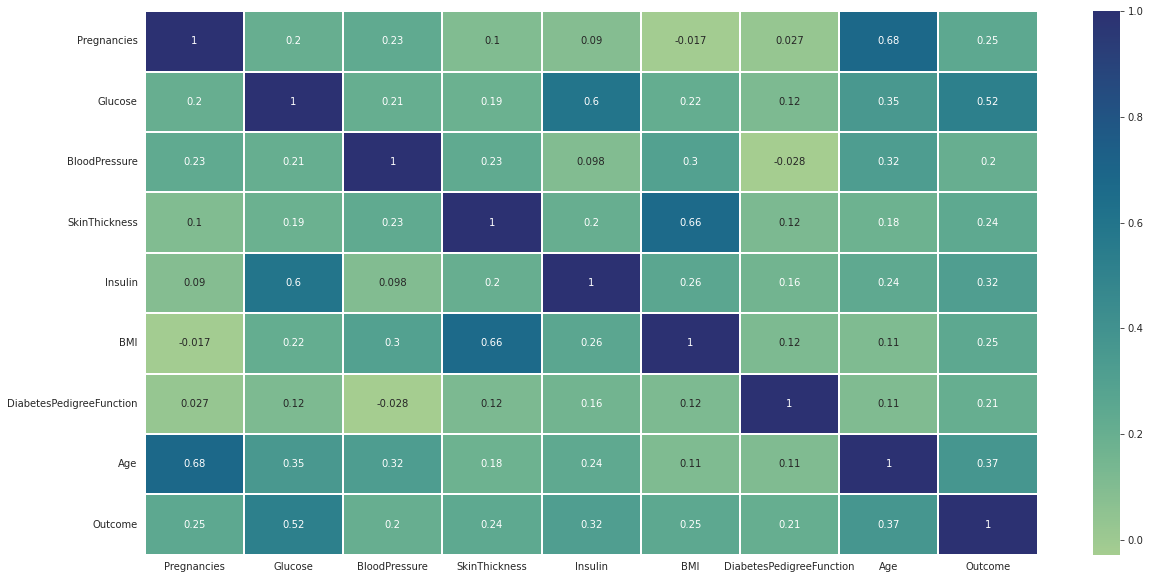

In [92]:
plt.figure(figsize=(20,10))
sns.heatmap(second_type.corr(), cmap='crest', linewidth=0.2, annot=True)

In [399]:
train_data, test_data = train_test_split(second_type, test_size=0.20, random_state=23042020)

In [53]:
train_data_features = train_data.drop(['Outcome'], axis=1)
train_data_target = train_data['Outcome']
test_data_features = test_data.drop(['Outcome'], axis=1)
test_data_target = test_data['Outcome']

In [401]:
%%time

best_estim = 0
best_accuracy = 0

for estim in range(1,150):
    model = RandomForestClassifier(random_state=23042020, n_estimators=estim)
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(test_data_features)
    accuracy = accuracy_score(test_data_target, valid_predictions)
    print('Количество деревьев', estim,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшая количество деревьев', best_estim,'Лучшая точность', best_accuracy)      

Количество деревьев 1 Точность 0.7272727272727273
Количество деревьев 2 Точность 0.7402597402597403
Количество деревьев 3 Точность 0.8051948051948052
Количество деревьев 4 Точность 0.7792207792207793
Количество деревьев 5 Точность 0.8051948051948052
Количество деревьев 6 Точность 0.7792207792207793
Количество деревьев 7 Точность 0.7662337662337663
Количество деревьев 8 Точность 0.7662337662337663
Количество деревьев 9 Точность 0.7922077922077922
Количество деревьев 10 Точность 0.7922077922077922
Количество деревьев 11 Точность 0.7792207792207793
Количество деревьев 12 Точность 0.7922077922077922
Количество деревьев 13 Точность 0.8051948051948052
Количество деревьев 14 Точность 0.7922077922077922
Количество деревьев 15 Точность 0.7922077922077922
Количество деревьев 16 Точность 0.8181818181818182
Количество деревьев 17 Точность 0.8181818181818182
Количество деревьев 18 Точность 0.8181818181818182
Количество деревьев 19 Точность 0.8051948051948052
Количество деревьев 20 Точность 0.805194

In [402]:
%%time
best_forest_model = RandomForestClassifier(random_state=23042020, n_estimators=best_estim)
best_forest_model.fit(train_data_features, train_data_target)
valid_predictions = best_forest_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, valid_predictions)
print('Количество деревьев', best_estim, 'Точность',accuracy)

Количество деревьев 16 Точность 0.8181818181818182
CPU times: user 62.7 ms, sys: 7.99 ms, total: 70.7 ms
Wall time: 68.6 ms


In [33]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn.neural_network')
best_max_iter = 0
best_accuracy = 0

for max_iter in range(200,300):
    model = LogisticRegression(random_state=23042020, max_iter=max_iter)
    model.fit(train_data_features, train_data_target)
    valid_predictions = model.predict(test_data_features)
    accuracy = accuracy_score(test_data_target, valid_predictions)
    print('Количество итерраций', max_iter,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

print('Лучшая количество итерраций', best_max_iter,'Лучшая точность', best_accuracy)

Количество итерраций 200 Точность 0.7575757575757576
Количество итерраций 201 Точность 0.7575757575757576
Количество итерраций 202 Точность 0.7575757575757576
Количество итерраций 203 Точность 0.7575757575757576
Количество итерраций 204 Точность 0.7575757575757576
Количество итерраций 205 Точность 0.7575757575757576
Количество итерраций 206 Точность 0.7575757575757576
Количество итерраций 207 Точность 0.7575757575757576
Количество итерраций 208 Точность 0.7575757575757576
Количество итерраций 209 Точность 0.7575757575757576
Количество итерраций 210 Точность 0.7575757575757576
Количество итерраций 211 Точность 0.7575757575757576
Количество итерраций 212 Точность 0.7575757575757576
Количество итерраций 213 Точность 0.7575757575757576
Количество итерраций 214 Точность 0.7575757575757576
Количество итерраций 215 Точность 0.7575757575757576
Количество итерраций 216 Точность 0.7575757575757576
Количество итерраций 217 Точность 0.7575757575757576
Количество итерраций 218 Точность 0.7575757575

In [34]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn.neural_network')

best_reg_model = LogisticRegression(random_state=23042020, max_iter=best_max_iter)
best_reg_model.fit(train_data_features, train_data_target)
valid_predictions = best_reg_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, valid_predictions)
print('Количество итерраций', best_max_iter,'Точность',accuracy)

Количество итерраций 200 Точность 0.7575757575757576
CPU times: user 25.8 ms, sys: 55 µs, total: 25.8 ms
Wall time: 25.2 ms


In [406]:
best_svm_model = svm.SVC(max_iter=-1, C=1.2, kernel='linear', tol=1e-3, shrinking=False, decision_function_shape='ovo', probability=True)
best_svm_model.fit(train_data_features, train_data_target)

SVC(C=1.2, decision_function_shape='ovo', kernel='linear', probability=True,
    shrinking=False)

In [407]:
test_predictions = best_forest_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
print('Точность модели случайного леса на тестовой выборке',accuracy)

test_predictions = best_reg_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
print('Точность модели логистической регресиии на тестовой выборке',accuracy)

test_predictions = best_svm_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
print('Точность метода опорных векторов на тестовой выборке',accuracy)


Точность модели случайного леса на тестовой выборке 0.8181818181818182
Точность модели логистической регресиии на тестовой выборке 0.7922077922077922
Точность метода опорных векторов на тестовой выборке 0.8051948051948052


In [408]:
test_predictions = best_forest_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
print(f'Метрики для случайного леса: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}') 

Метрики для случайного леса: Accuracy = 0.8181818181818182, Precision = 0.6842105263157895, Recall = 0.6190476190476191


In [35]:
test_predictions = best_reg_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
f_score = f1_score(test_data_target, test_predictions)
print(f'Метрики для случайного леса: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, f1-мера = {f_score}')

Метрики для случайного леса: Accuracy = 0.7575757575757576, Precision = 0.6296296296296297, Recall = 0.7391304347826086, f1-мера = 0.68


In [410]:
test_predictions = best_svm_model.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
print(f'Метрики для метода опорных векторов: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}')

Метрики для метода опорных векторов: Accuracy = 0.8051948051948052, Precision = 0.65, Recall = 0.6190476190476191


In [30]:
import random
from random import randint
from math import e, log

def logistic_function(z):
    return 1 / (1 + e ** (-z))

def logistic_error(outputs, targets):
    error = 0
    for i, point in enumerate(targets):
        if outputs[i] == 1:
            outputs[i] = 0.99999
        if outputs[i] == 0:
            outputs[i] = 0.00001
        error -= targets[i] * log(outputs[i], e) - (1 - targets[i]) * log(1 - outputs[i], e)
    return error / len(targets)


class LogisticRegression:
    def __init__(self, random_state=42, max_iter=100):
        random.seed(random_state)
        self.weights = []
        self.max_iter = max_iter

    def forward(self, input_features):
        output = 0
        for i, feature in enumerate(input_features):
            output += self.weights[i] * feature
        return logistic_function(output + self.weights[-1])

    def train(self, inp, output, target, samples_num, lr):
        for j in range(len(self.weights) - 1):
            self.weights[j] += lr * (1 / samples_num) * (target - output) * inp.iloc[j]
        self.weights[-1] += lr * (1 / samples_num) * (target - output)

    def forward_list(self, inputs):
        inputs = inputs.reset_index(drop=True)
        return list([self.forward(inp) for idx, inp in inputs.iterrows()])

    def fit(self, inputs, targets, lr=0.1):
        # +1 for bias, bias is last weight
        self.weights = [randint(-100, 100) / 100 for _ in range(inputs.shape[1] + 1)]
        inputs = inputs.reset_index(drop=True)
        targets = targets.reset_index(drop=True)
        for epoch in range(self.max_iter):
            outputs = []
            for i, inp in inputs.iterrows():
                output = self.forward(inp)
                outputs.append(output)
                self.train(inp, output, targets.iloc[i], len(inputs), lr)
            print(f"epoch: {epoch}, error: {logistic_error(outputs, targets)}")

# Boolean distance
def accuracy(outputs, targets):
    true_outputs = 0
    for i, output in enumerate(outputs):
        if round(output) == targets.iloc[i]:
            true_outputs += 1
    return true_outputs/len(targets)

print(train_data_features.shape[0], len(train_data_target))
logr_model = LogisticRegression(random_state=42, max_iter=1000)
logr_model.fit(train_data_features, train_data_target)

outputs = list(map(round, logr_model.forward_list(test_data_features)))
accuracy = accuracy(outputs, test_data_target)
precision = precision_score(test_data_target, outputs)
recall = recall_score(test_data_target, outputs)
f_score = f1_score(test_data_target, outputs)
print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall, 'F1-мера =', f_score)

261 261
epoch: 0, error: 6.673605144098124
epoch: 1, error: 0.29668271707403393
epoch: 2, error: 0.31773683330655716
epoch: 3, error: 0.24635101040805854
epoch: 4, error: 0.14623843781733623
epoch: 5, error: 0.008462413812813324
epoch: 6, error: -0.008733034207259356
epoch: 7, error: -0.046338805979329045
epoch: 8, error: -0.05758253344949677
epoch: 9, error: -0.05379840581819012
epoch: 10, error: -0.04832085891207243
epoch: 11, error: -0.04427889249148251
epoch: 12, error: -0.04131363408160286
epoch: 13, error: -0.03888311138471927
epoch: 14, error: -0.036719763075560144
epoch: 15, error: -0.034721778688552675
epoch: 16, error: -0.032871032657681515
epoch: 17, error: -0.031200546539165885
epoch: 18, error: -0.029773838493615905
epoch: 19, error: -0.028634420084151638
epoch: 20, error: -0.027690192597471953
epoch: 21, error: -0.026635993251389677
epoch: 22, error: -0.025275725297942572
epoch: 23, error: -0.02387256964734717
epoch: 24, error: -0.022761001693467835
epoch: 25, error: -0.0

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

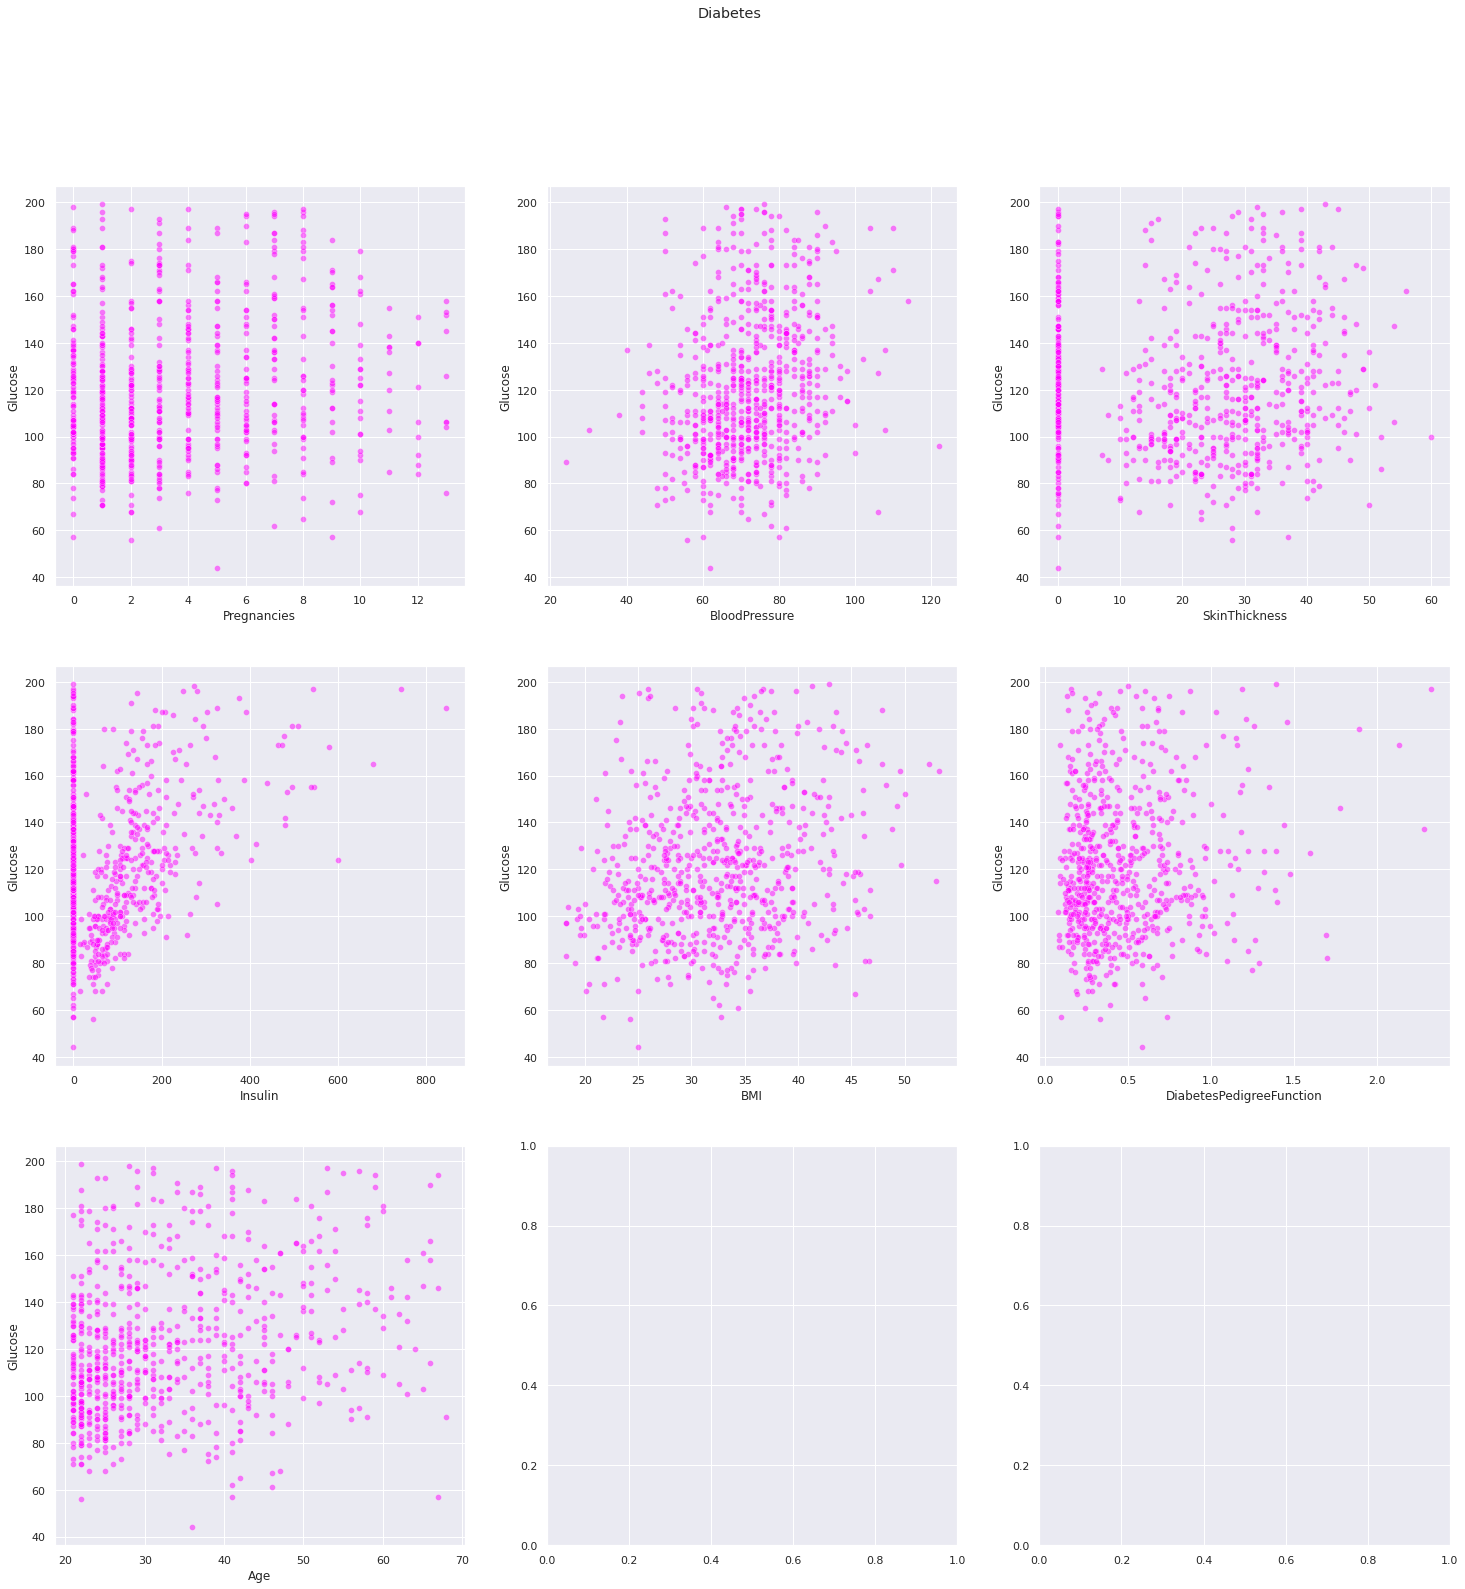

In [6]:
fig, axes = plt.subplots(3, 3, figsize = (25, 25))
sns.set()
fig.suptitle('Diabetes')

sns.scatterplot(x='Pregnancies', y='Glucose', data=data, ax = axes[0, 0], alpha = 0.50 , color=(1, 0, 1, 1))
sns.scatterplot(x='BloodPressure', y='Glucose', data=data, ax = axes[0, 1], alpha = 0.5 , color=(1, 0, 1, 1))
sns.scatterplot(x='SkinThickness', y='Glucose', data=data, ax = axes[0, 2], alpha = 0.5, color=(1, 0, 1, 1))
sns.scatterplot(x='Insulin', y='Glucose', data=data, ax = axes[1, 0], alpha = 0.5, color=(1, 0, 1, 1))
sns.scatterplot(x='BMI', y='Glucose', data=data, ax = axes[1, 1], alpha = 0.5, color=(1, 0, 1, 1))
sns.scatterplot(x='DiabetesPedigreeFunction', y='Glucose', data=data, ax = axes[1, 2], alpha = 0.5, color=(1, 0, 1, 1))
sns.scatterplot(x='Age', y='Glucose', data=data, ax = axes[2, 0], alpha = 0.5, color=(1, 0, 1, 1))

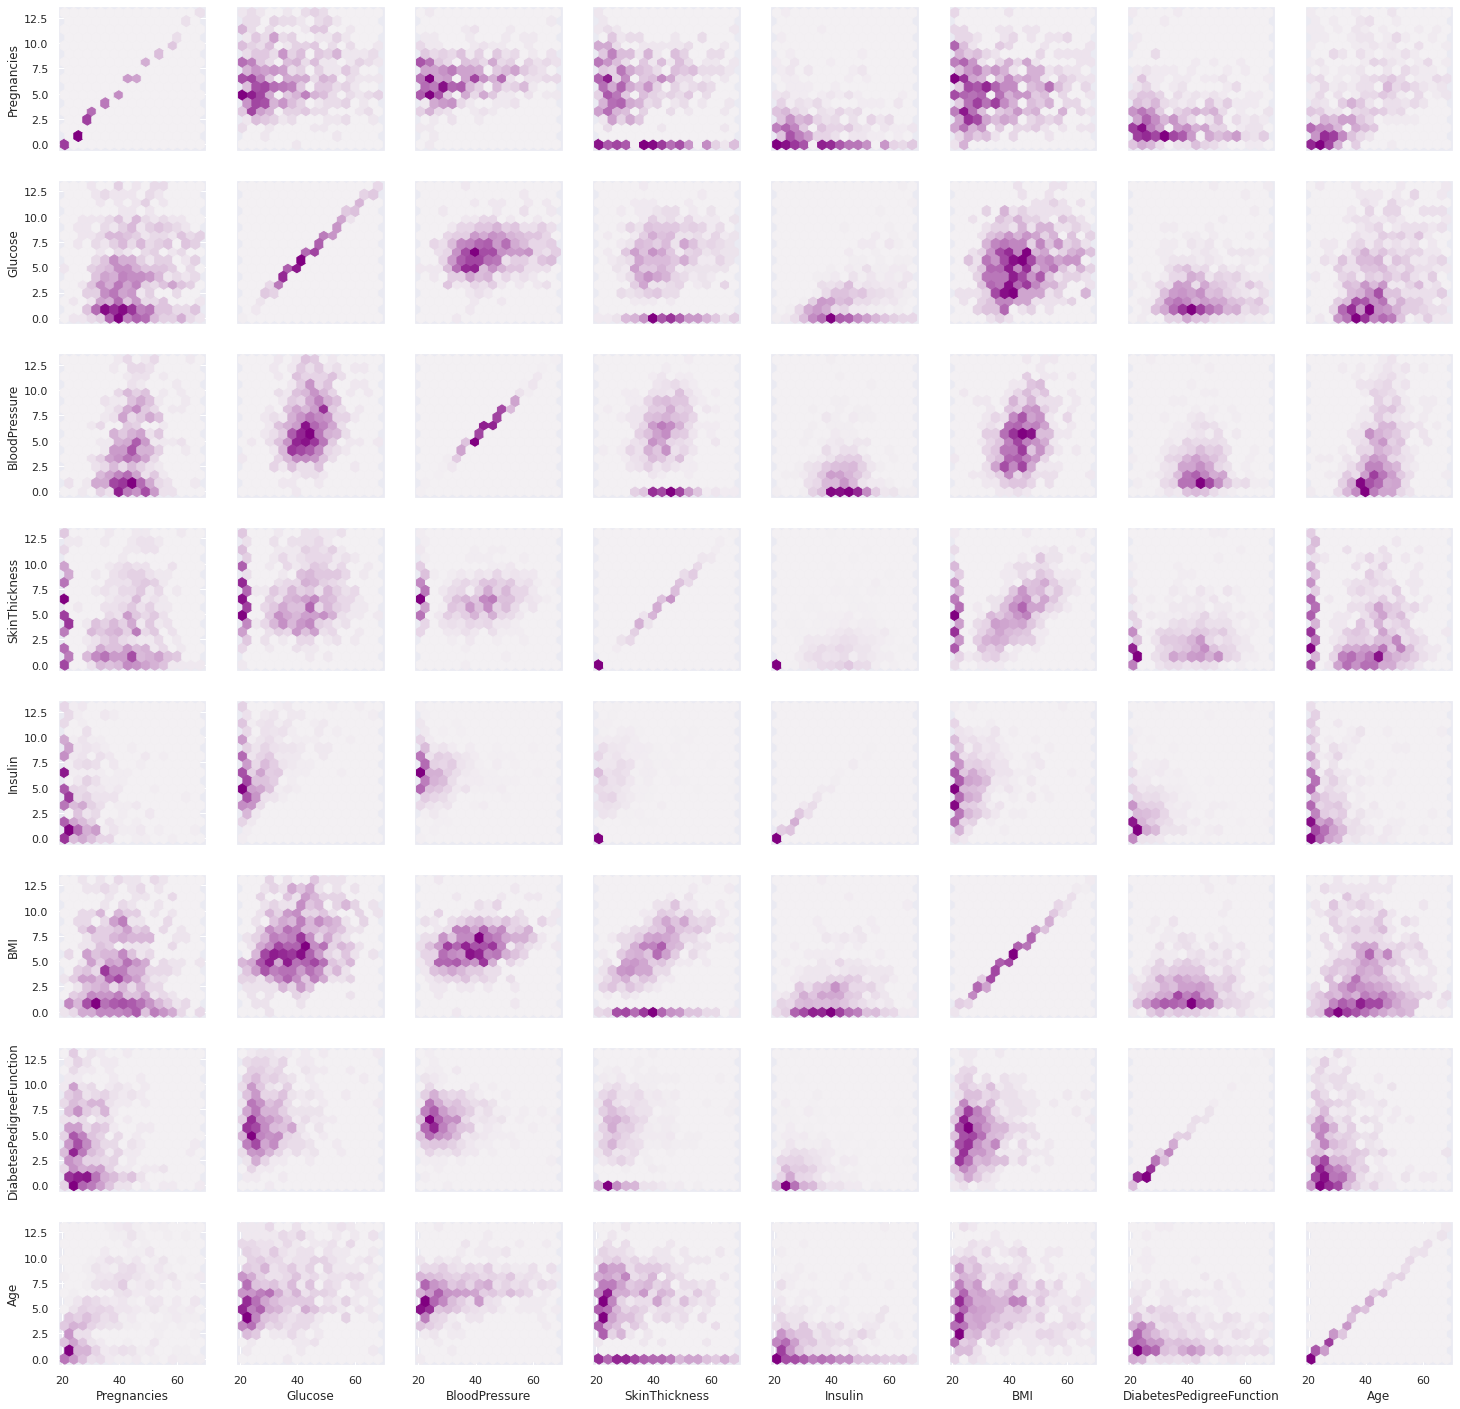

In [34]:
def plot_hexbin(columns):
    n = len(columns)
    fig, axes = plt.subplots(n, n, figsize = (25, 25))
    for i in range(n):
        for j in range(n):
            axes[i,j].hexbin(data[columns[i]], data[columns[j]], gridsize=15, cmap=sns.light_palette("purple", as_cmap=True))
            if i != n-1:
                axes[i,j].set_xticks([])
            if j != 0:
                axes[i,j].set_yticks([])
    for i in range(n):
        axes[i,0].set_ylabel(columns[i])
        axes[n-1,i].set_xlabel(columns[i])
#sns.set()
#sns.jointplot(x='Pregnancies', y='Glucose', kind="hex", data=data, color=(1, 0, 1, 1))
#sns.jointplot(x='BloodPressure', y='Glucose', kind="hex", data=data, color=(1, 0, 1, 1))
#sns.jointplot(x='SkinThickness', y='Glucose', kind="hex", data=data,  color=(1, 0, 1, 1))
#sns.jointplot(x='Insulin', y='Glucose', kind="hex", data=data, color=(1, 0, 1, 1))
#sns.jointplot(x='BMI', y='Glucose', kind="hex", data=data, color=(1, 0, 1, 1))
#sns.jointplot(x='DiabetesPedigreeFunction', y='Glucose', kind="hex", data=data, color=(1, 0, 1, 1))
#sns.jointplot(x='Age', y='Glucose', kind="hex", data=data, color=(1, 0, 1, 1))
plot_hexbin(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

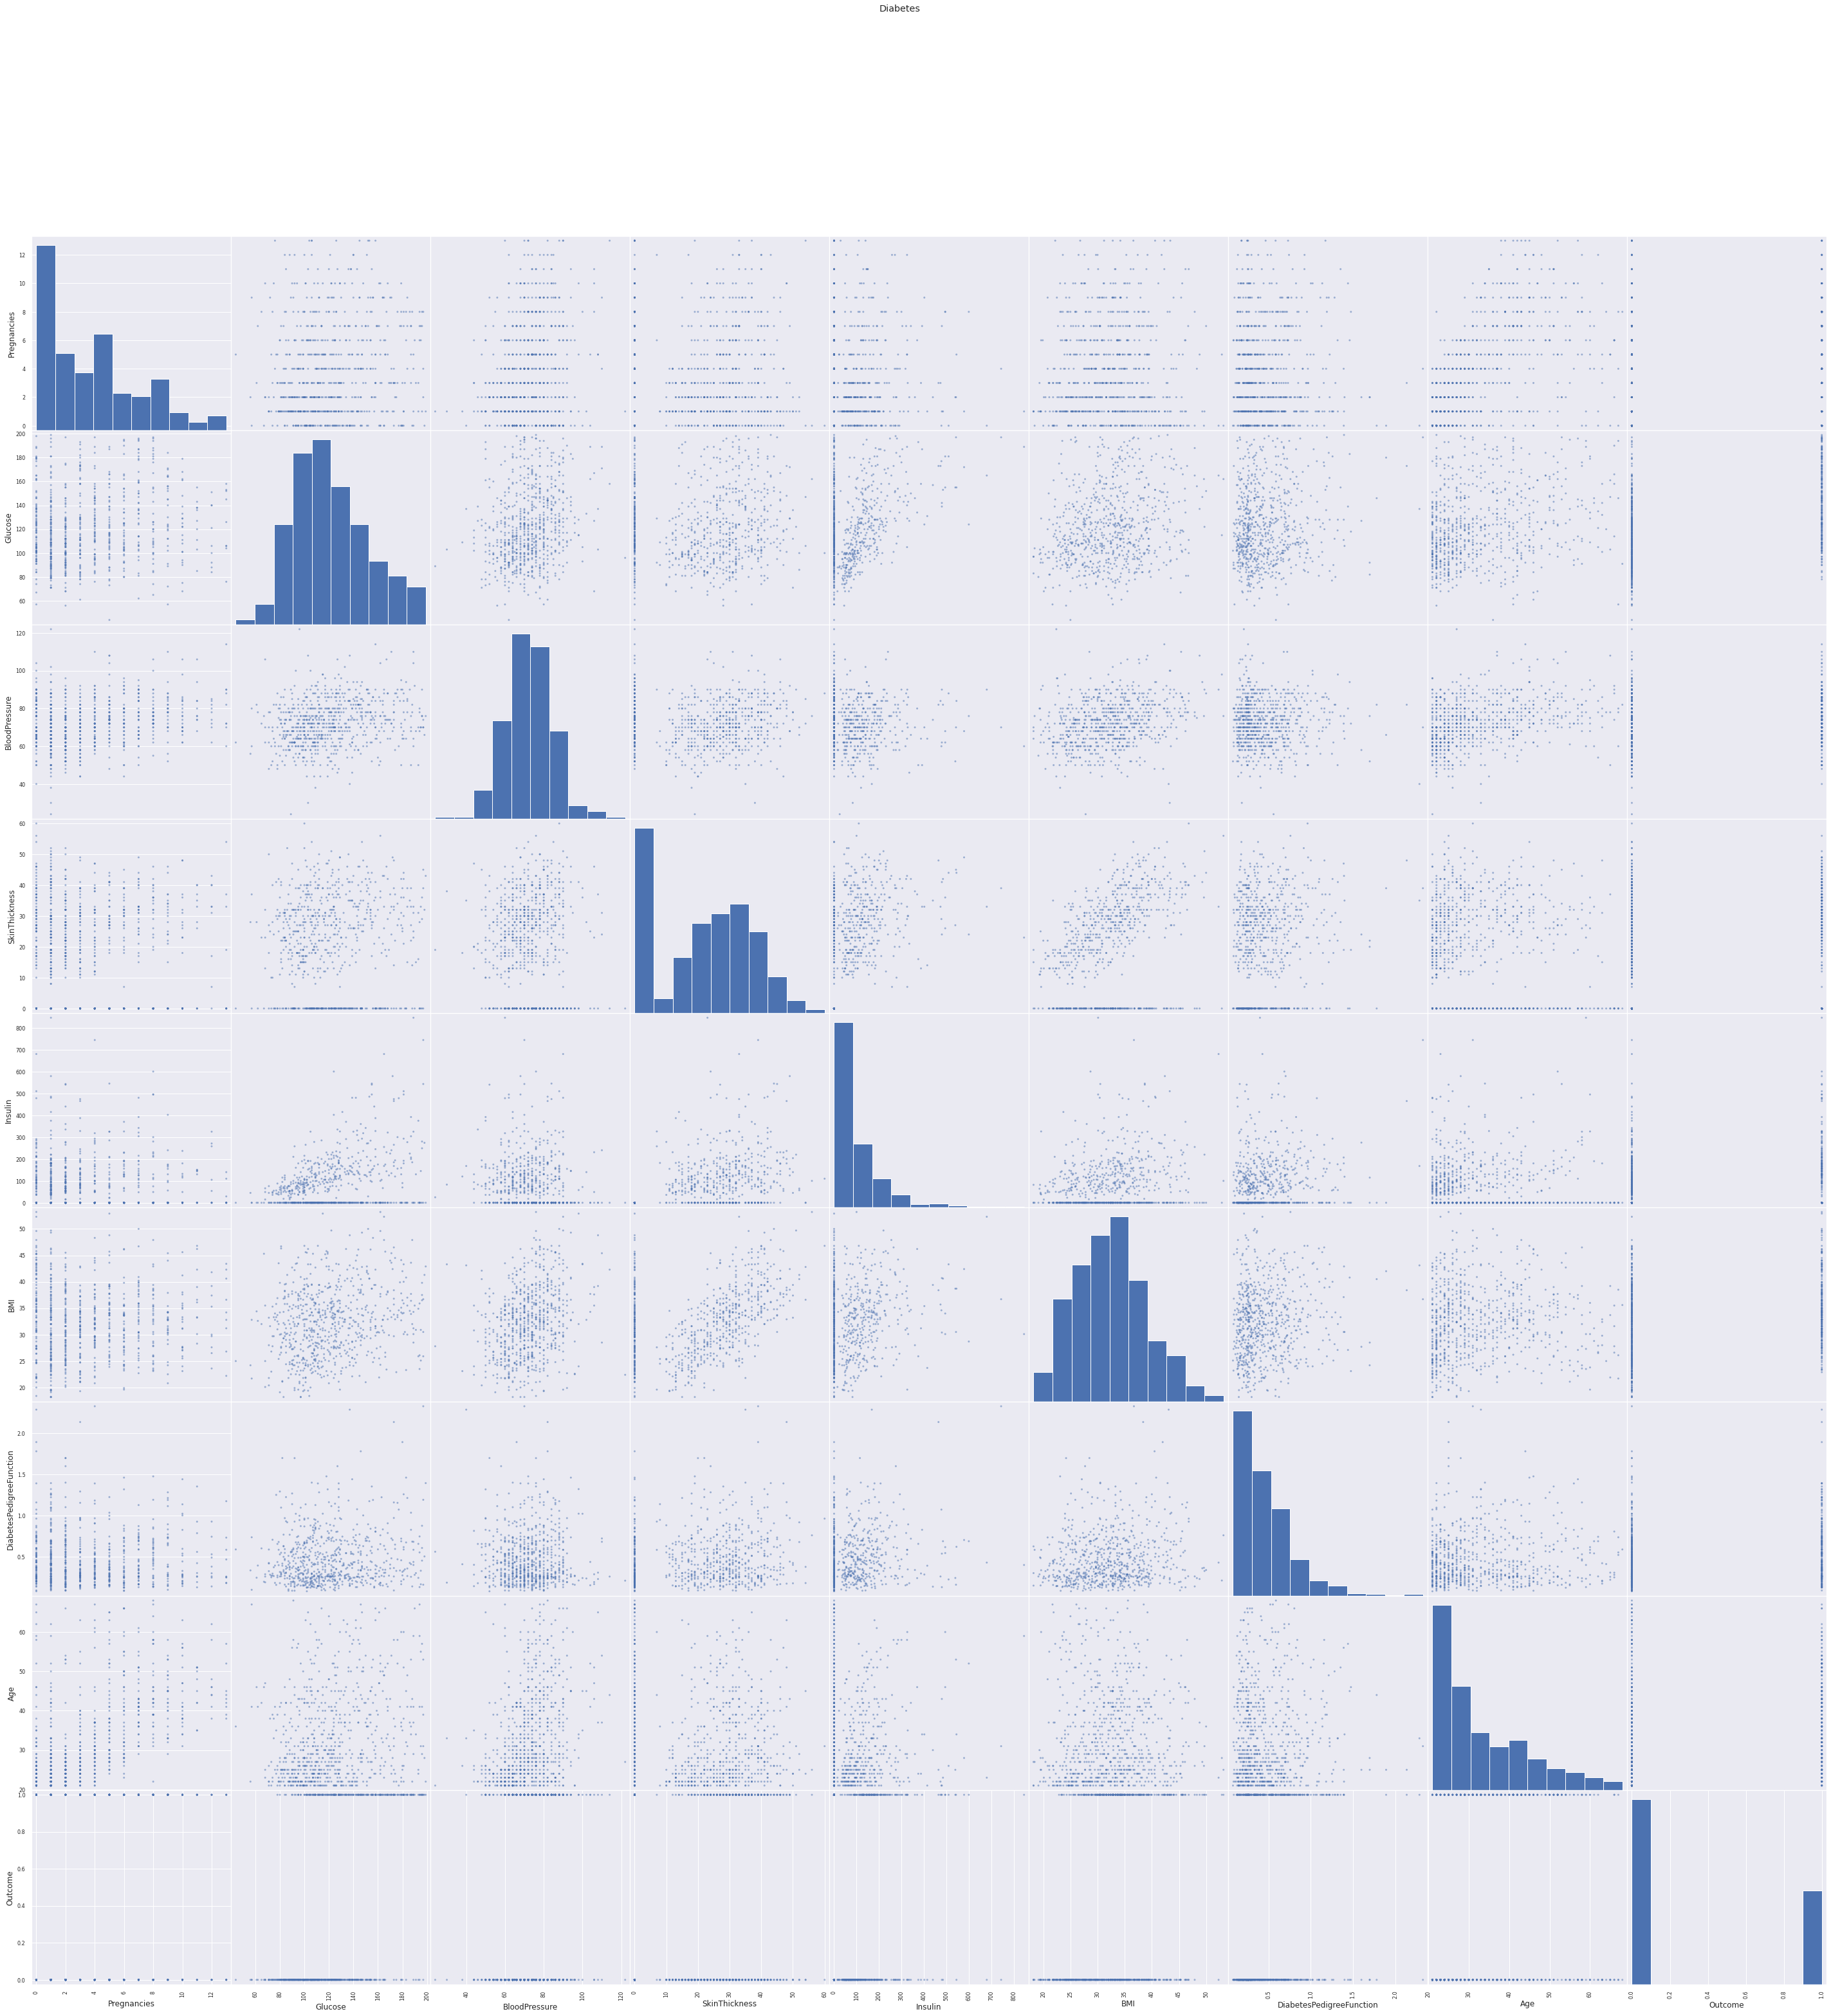

In [25]:
pd.plotting.scatter_matrix(data, figsize = (50, 50), )
plt.suptitle('Diabetes')
plt.show()